In [46]:
%pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


NameError: name 'x_time' is not defined

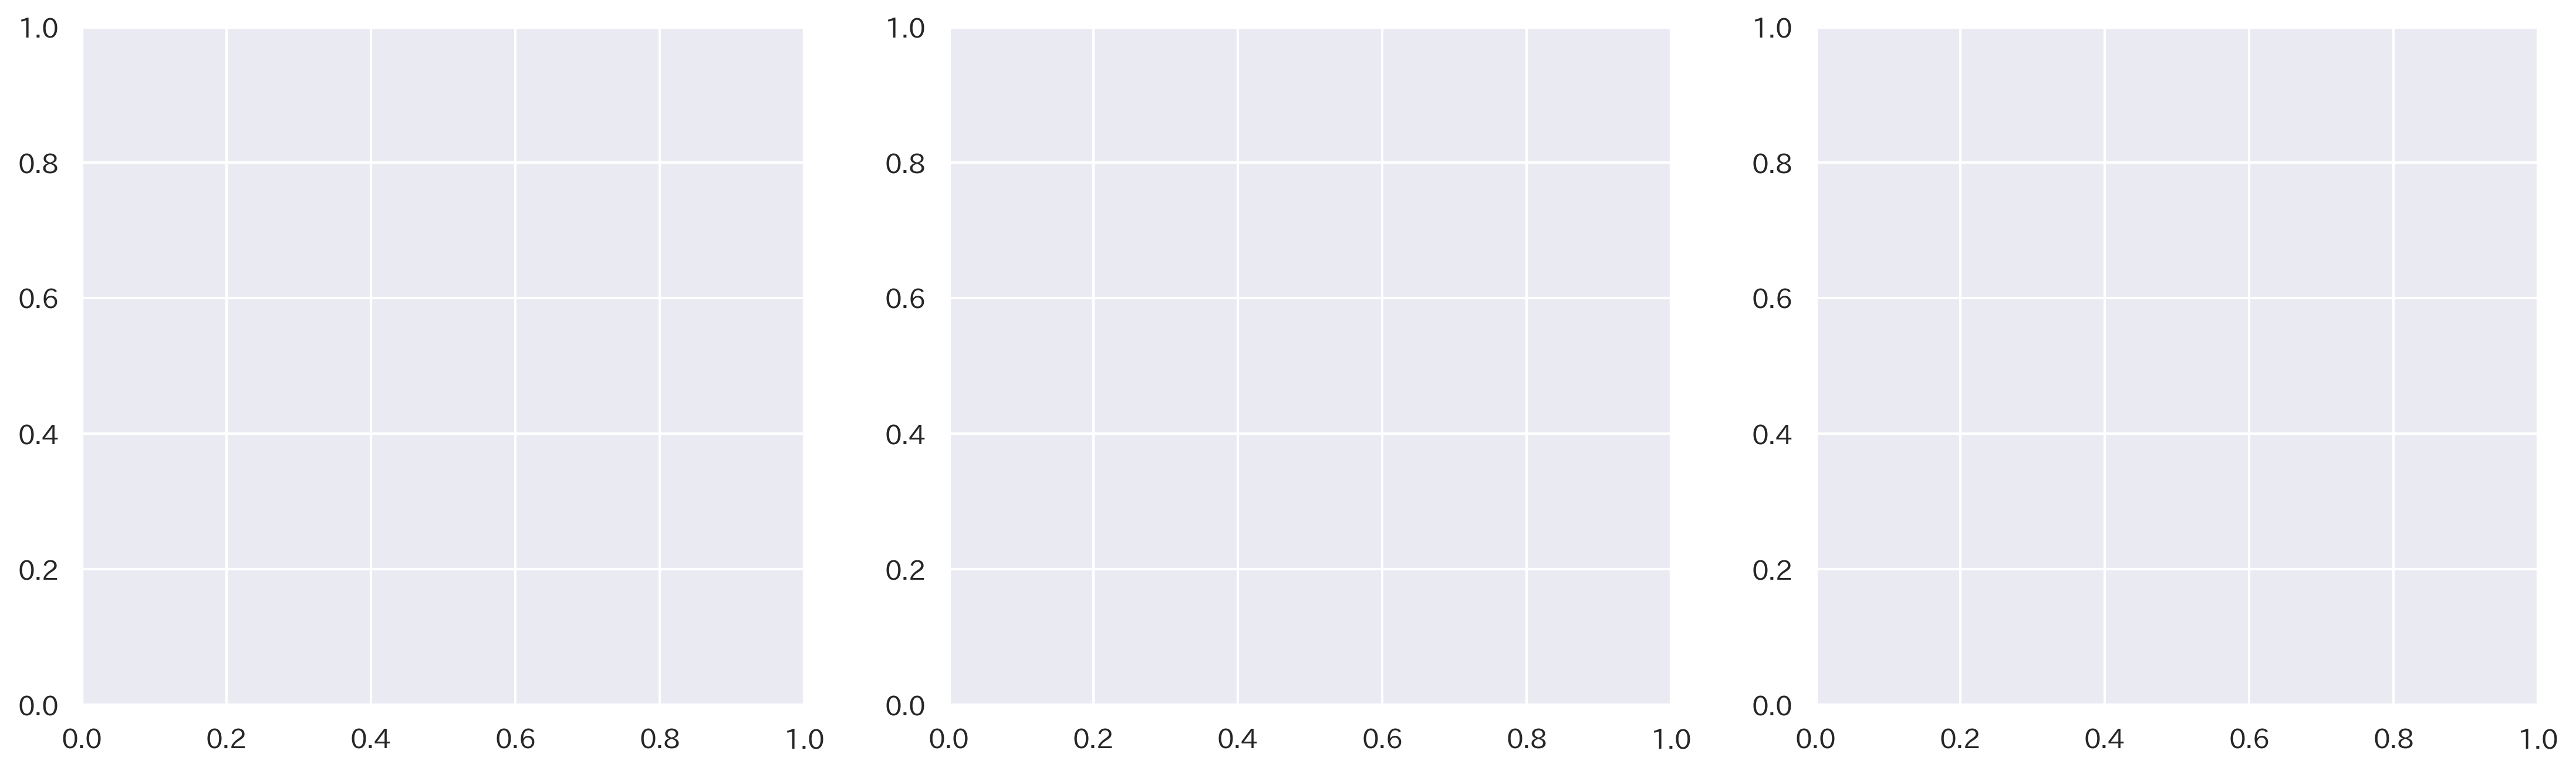

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#例えば、seaborn を利用している場合であれば sns.set() などで描画フォントが seaborn のデフォルトに上書きされ、日本語表示がされなくなります。
#sns.set(font="IPAexGothic") のように利用フォントに IPAexGothic を設定するか、フォント上書き後に japanize_matplotlib.japanize() を利用するなどで日本語表示できるはずです。
import japanize_matplotlib
japanize_matplotlib.japanize()
import pandas as pd
import os
import glob
import re
import shutil

#一つのグラフに入れるデータは、一つのディレクトリにまとめておく
data_directory = "/home/biofunc/data220122"


#グラフのラベル
graph_xlabel = 'time (min)'
graph_ylabel = ['ドパミン濃度 (pg/1μL)', 'ドパミン基準濃度からの変化率(倍)', 'ドパミン基準濃度からの変化量 (pg/1μL)']
graph_title = ['(a)ドパミン濃度の経時的変化', '(b)ドパミン基準濃度からの変化率の経時的変化', '(c)ドパミン基準濃度からの変化量の経時的変化']
graph_line_x = 270
graph_line_label = 'K+ACSFに切替え'

#グラフ作成
fig, ax = plt.subplots(1, 3, figsize=(18, 5), dpi=300)
x_time_range = x_time[sample_type_start_and_end[sample_order['baseline']][0] - len(data_str[0]) + 1: sample_type_start_and_end[sample_order['fruction']][1] - len(data_str[0]) + 1: 1]
for i in range(len(data)):
    str_model = LinearRegression(fit_intercept=False)
    str_model.fit(x_DAstr_pg[i][:, np.newaxis], data_str[i]) #スタンダード統一できたらここ調整
    str_fit = str_model.predict(x_DAstr_pg[i][:, np.newaxis])
    baseline = np.average(data_baseline[i]) / str_model.coef_[0]
    ax[0].plot(x_time_range, np.concatenate([data_baseline[i], data_fruction[i]]) / str_model.coef_[0], label=sample_name[i])
    ax[1].plot(x_time_range, np.concatenate([data_baseline[i], data_fruction[i]]) / (str_model.coef_[0] * baseline), label=sample_name[i])
    ax[2].plot(x_time_range, np.concatenate([data_baseline[i], data_fruction[i]]) / (str_model.coef_[0]) - baseline, label=sample_name[i])
    print(f'{sample_name[i]}の傾きは{str_model.coef_[0]}、決定係数R^2は{r2_score(data_str[i], str_fit)}')
    print(f"ベースラインのDA濃度は{baseline} pg/1ml")

#サンプル切替え時点ラインの挿入、横軸間隔、軸名、データ名の設定
for i in range(len(graph_ylabel)):
    ax[i].axvline(x=graph_line_x, color='black', linestyle=':', label=graph_line_label)
    ax[i].set(xlabel=graph_xlabel, ylabel=graph_ylabel[i], title=graph_title[i], xticks=x_time_range)
    ax[i].legend();

# テキストをテキストとして出力する設定
plt.rc("svg", fonttype="none")
# SVGとして保存
fig.savefig(os.path.join(data_directory, "sample.svg"))

In [151]:
import matplotlib
path_to_RawData_folder = '/home/biofunc/data/ラット行動実験データ（生体機能・組織培養室PC）/Data'
def make_graph_from_xlsx(path_to_RawData_folder):
    path_to_graph_folder = path_to_RawData_folder + '/graph'
    if not os.path.exists(path_to_graph_folder):
        os.mkdir(path_to_graph_folder)
    elif os.path.exists(path_to_graph_folder):
        shutil.rmtree(path_to_graph_folder)
        os.mkdir(path_to_graph_folder)
    
    list_of_path_to_xlsx_folder = sorted(glob.glob(path_to_RawData_folder + '/xlsx_from_json' + '*'))

    #print('check point 1')
    #print(list_of_path_to_xlsx_folder)

    for a_path in list_of_path_to_xlsx_folder:
        # print(a_path)
        list_of_path_to_all_rats_xlsx = sorted(glob.glob(a_path + '/all_rats' + '*' + '.xlsx'))
        variation_of_this_folder = a_path.split('.')[1]
        largest_mod_num = 0
        a_path_to_all_rats_xlsx_largest_mod = ''
        for a_path in list_of_path_to_all_rats_xlsx:
            mod_num = re.findall('mod(\d+)', a_path)
            if int(mod_num[0]) > largest_mod_num:
                largest_mod_num = int(mod_num[0])
                a_path_to_all_rats_xlsx_largest_mod = a_path
        # print('check point 1')
        # print(a_path_to_all_rats_xlsx_largest_mod)

        # header=[0,1]で、1行目と2行目をヘッダーとして読み込む
        df_of_all_rats = pd.read_excel(a_path_to_all_rats_xlsx_largest_mod, header=[0,1], index_col=[0])
        # print('check point 2')
        # print(variation_of_this_folder)

        # make figure
        list_of_analysed_data_variety = df_of_all_rats.columns.get_level_values('data').unique().to_list()
        fig, ax = plt.subplots(1, len(list_of_analysed_data_variety), figsize=(18, 5), dpi=300)
        for a_data_No in range(len(list_of_analysed_data_variety)):
            # 実験の種類を取得
            a_data = list_of_analysed_data_variety[a_data_No]
            list_of_type_of_experiment = sorted(set([i.split('_')[0].upper() for i in df_of_all_rats[a_data].columns.get_level_values('subject').tolist()]))
        
            for a_type_No in range(len(list_of_type_of_experiment)):
                a_type_of_experiment = list_of_type_of_experiment[a_type_No]
                
                #averegeのcolor mapは濃い
                color_of_average = plt.cm.tab20(a_type_No*2)
                #subjectのcolor mapは薄い
                color_of_subject = plt.cm.tab20(a_type_No*2 + 1)
                #######################################
                print('check point 3')
                print(a_type_No, a_type_of_experiment)
                print(a_type_No*2, a_type_No*2+1)
                #######################################

                for a_subject in df_of_all_rats.columns.get_level_values('subject'):
                    if re.findall('(_average)', a_subject) != []:
                        ax[a_data_No].plot(df_of_all_rats.index, df_of_all_rats[a_data][a_subject], label=a_subject, color=color_of_average)

                    elif re.findall('(_std)', a_subject) == [] and re.findall('(_sem)', a_subject) == []:
                        ax[a_data_No].plot(df_of_all_rats.index, df_of_all_rats[a_data][a_subject], label=a_subject, color=color_of_subject)









check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3
check point 3
0 DIFF
0 1
check point 3
1 MIXED
2 3


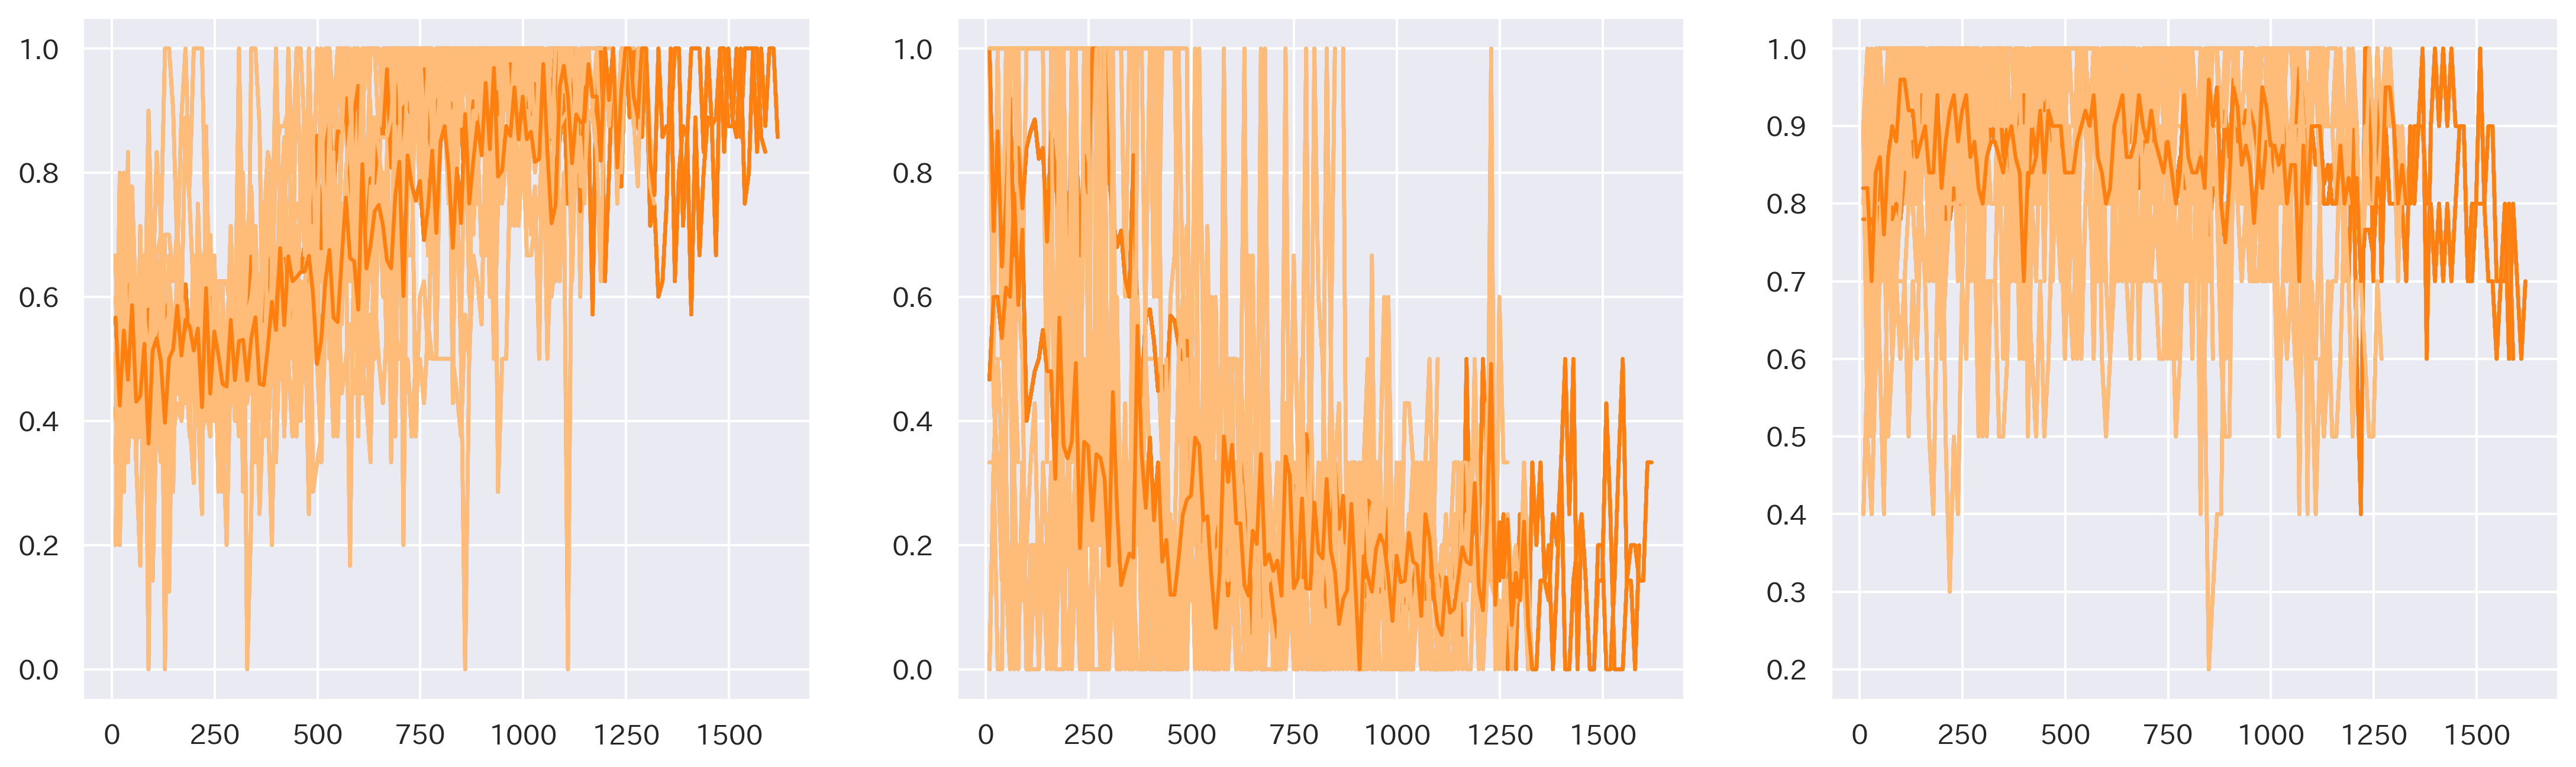

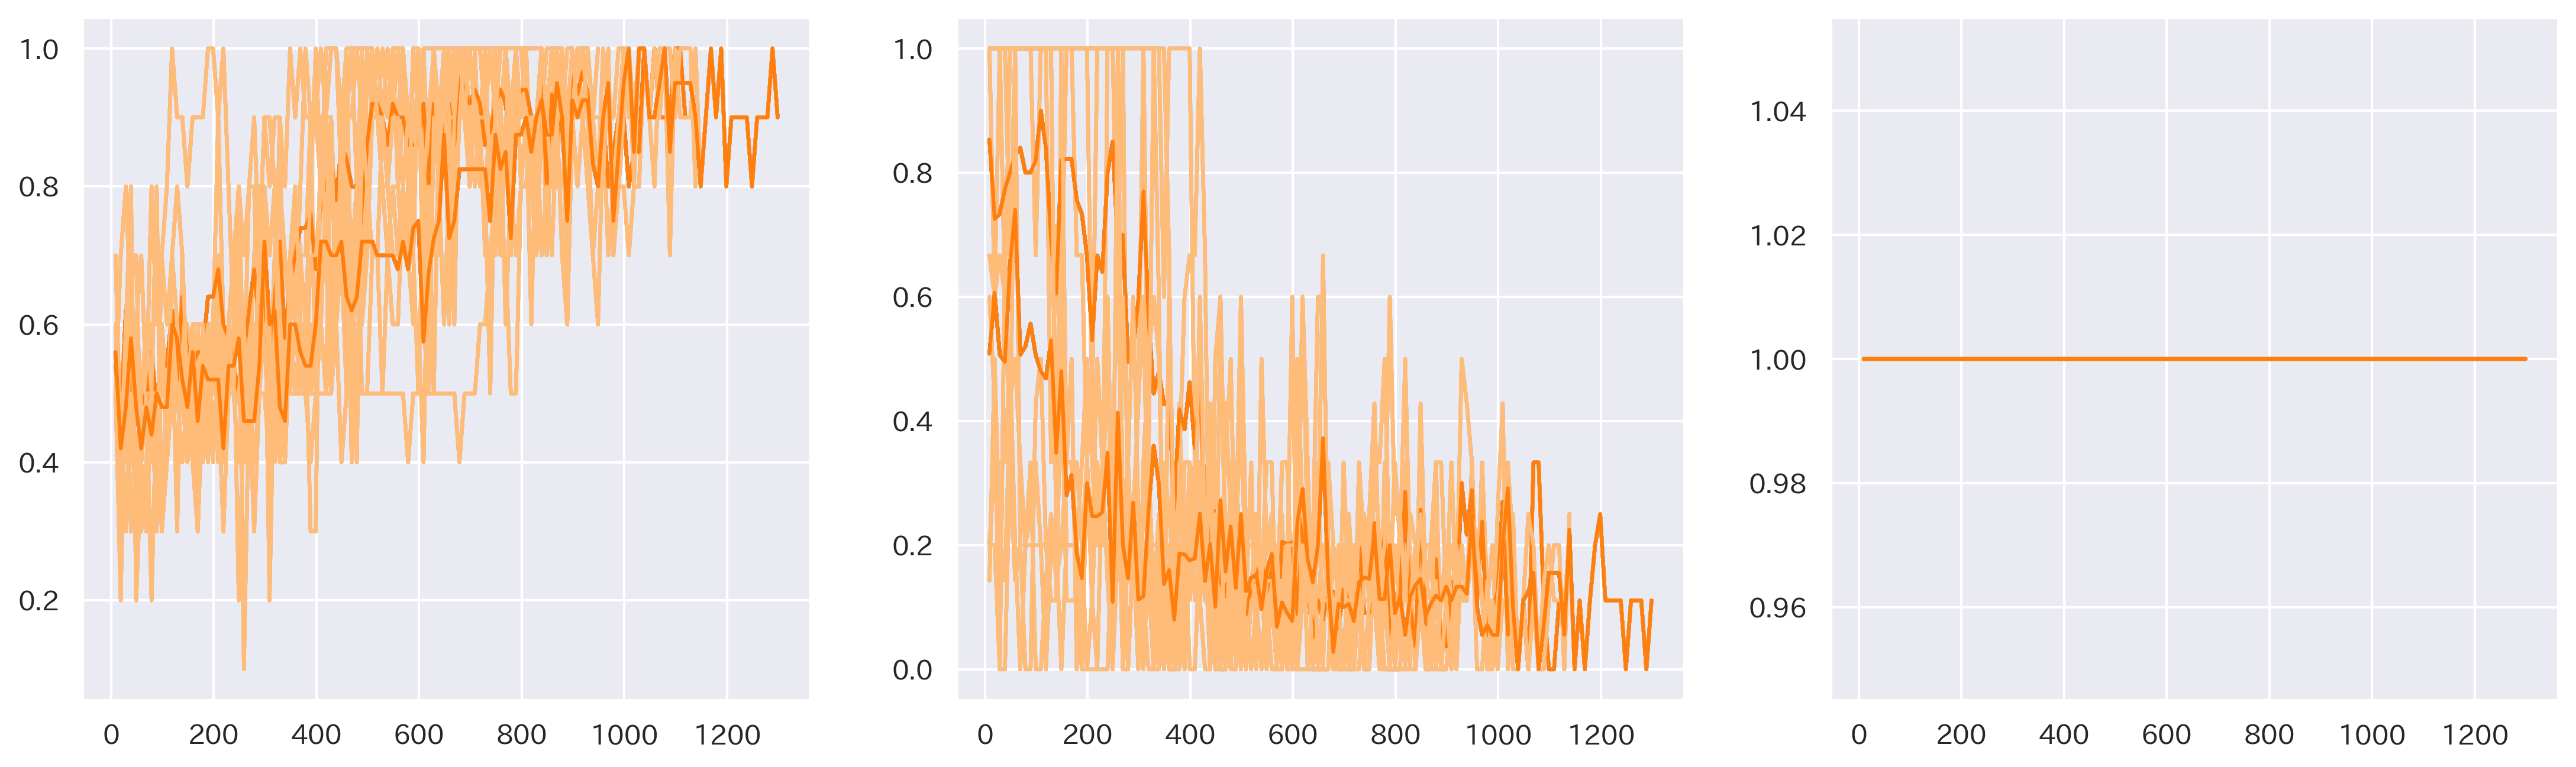

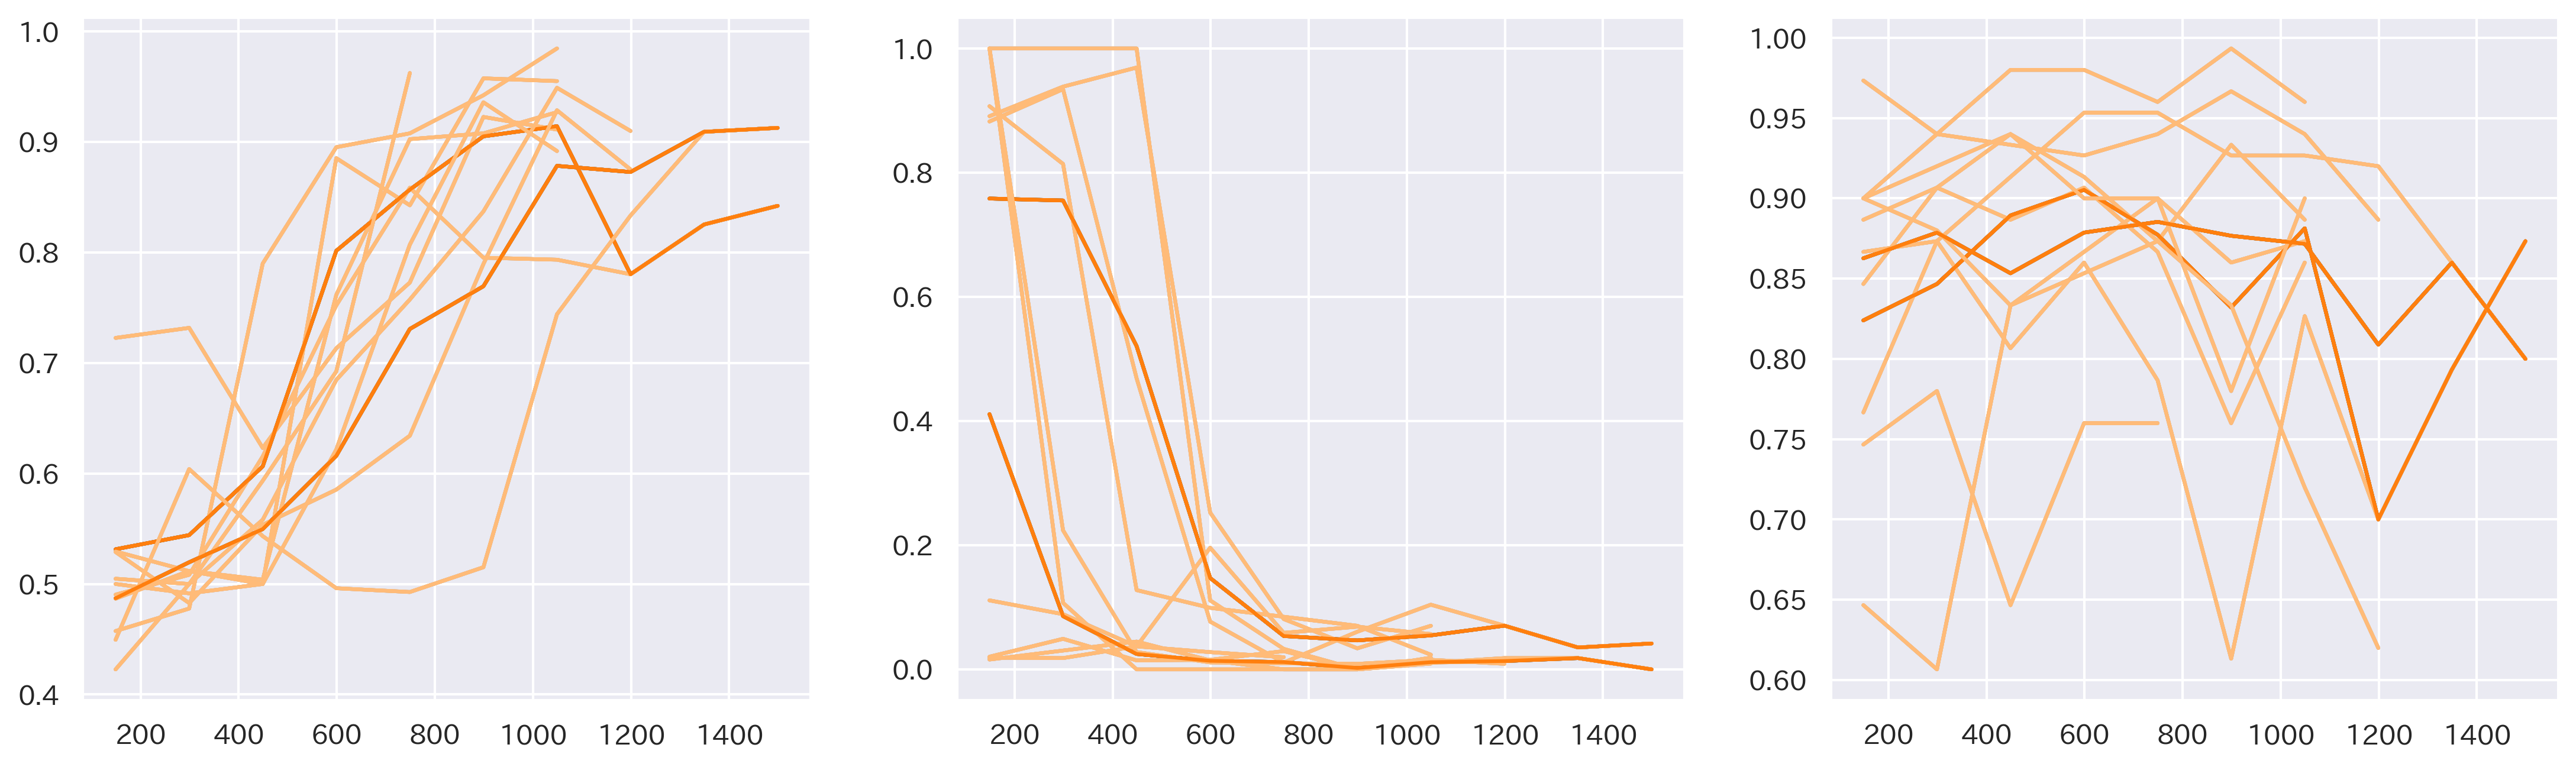

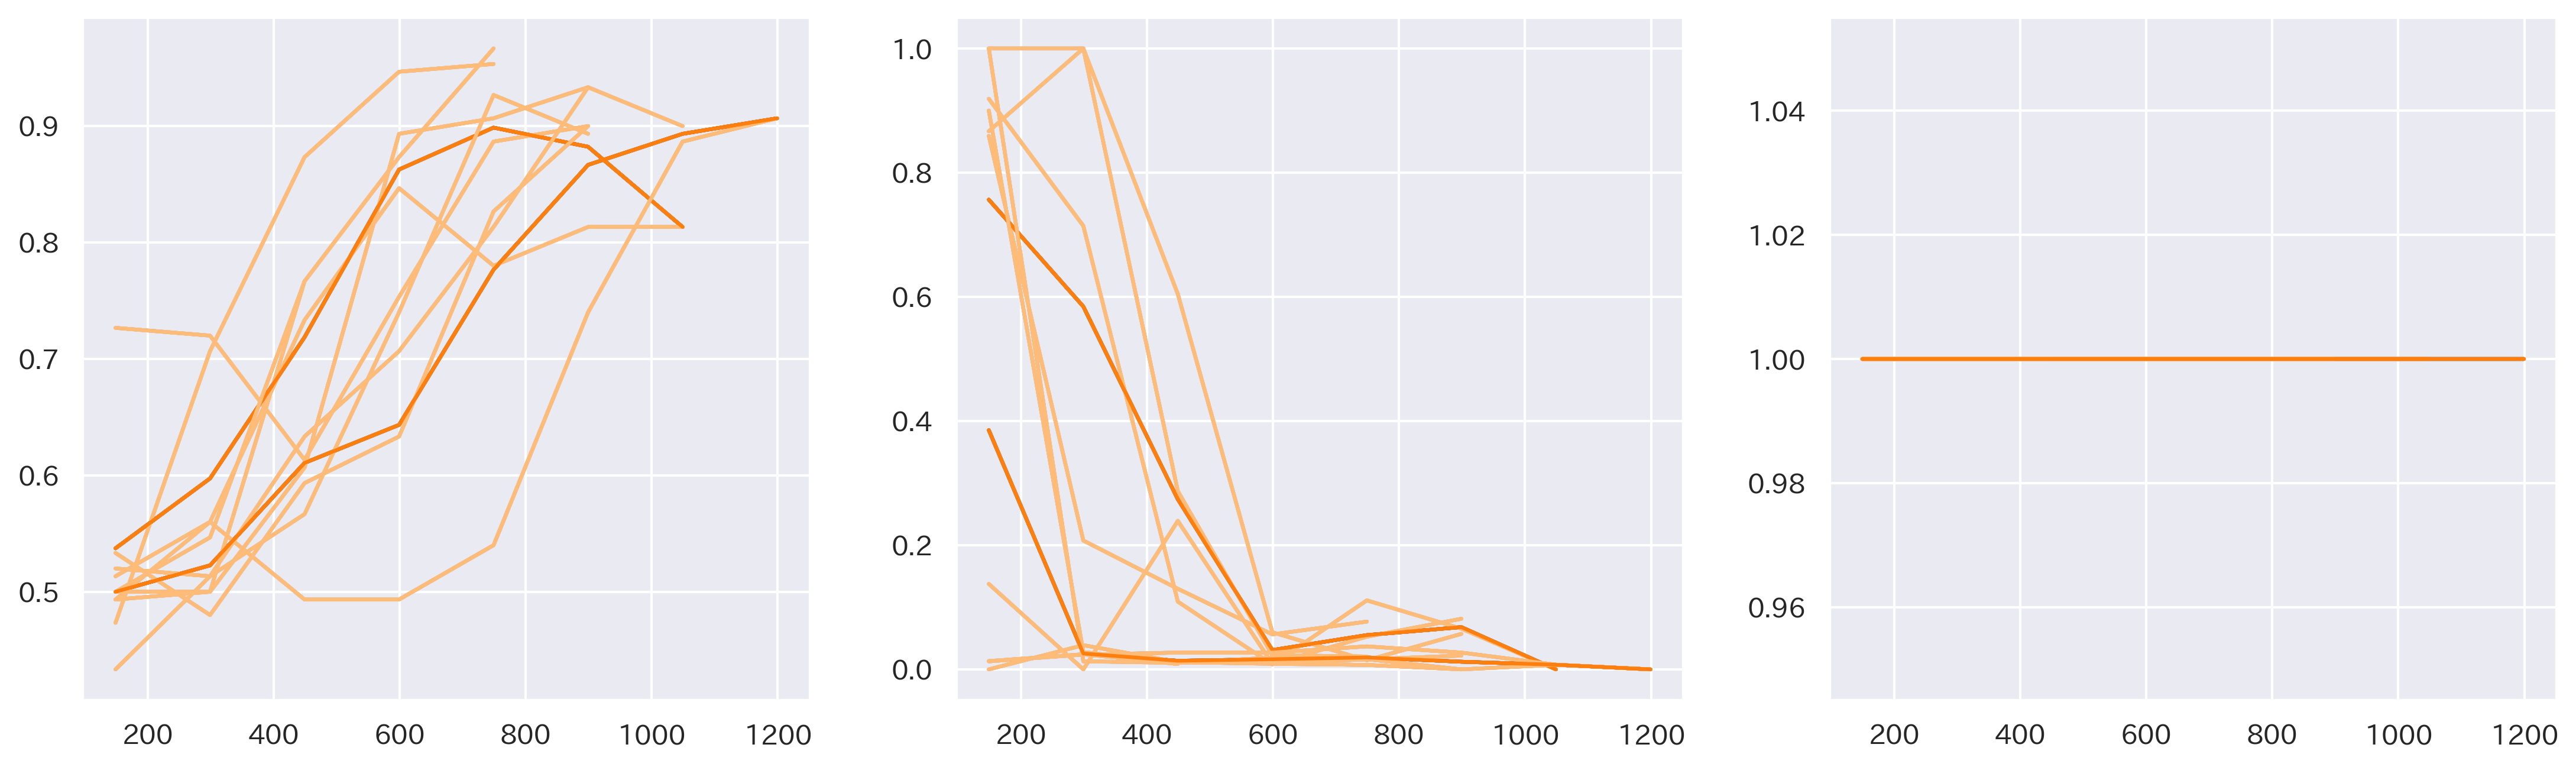

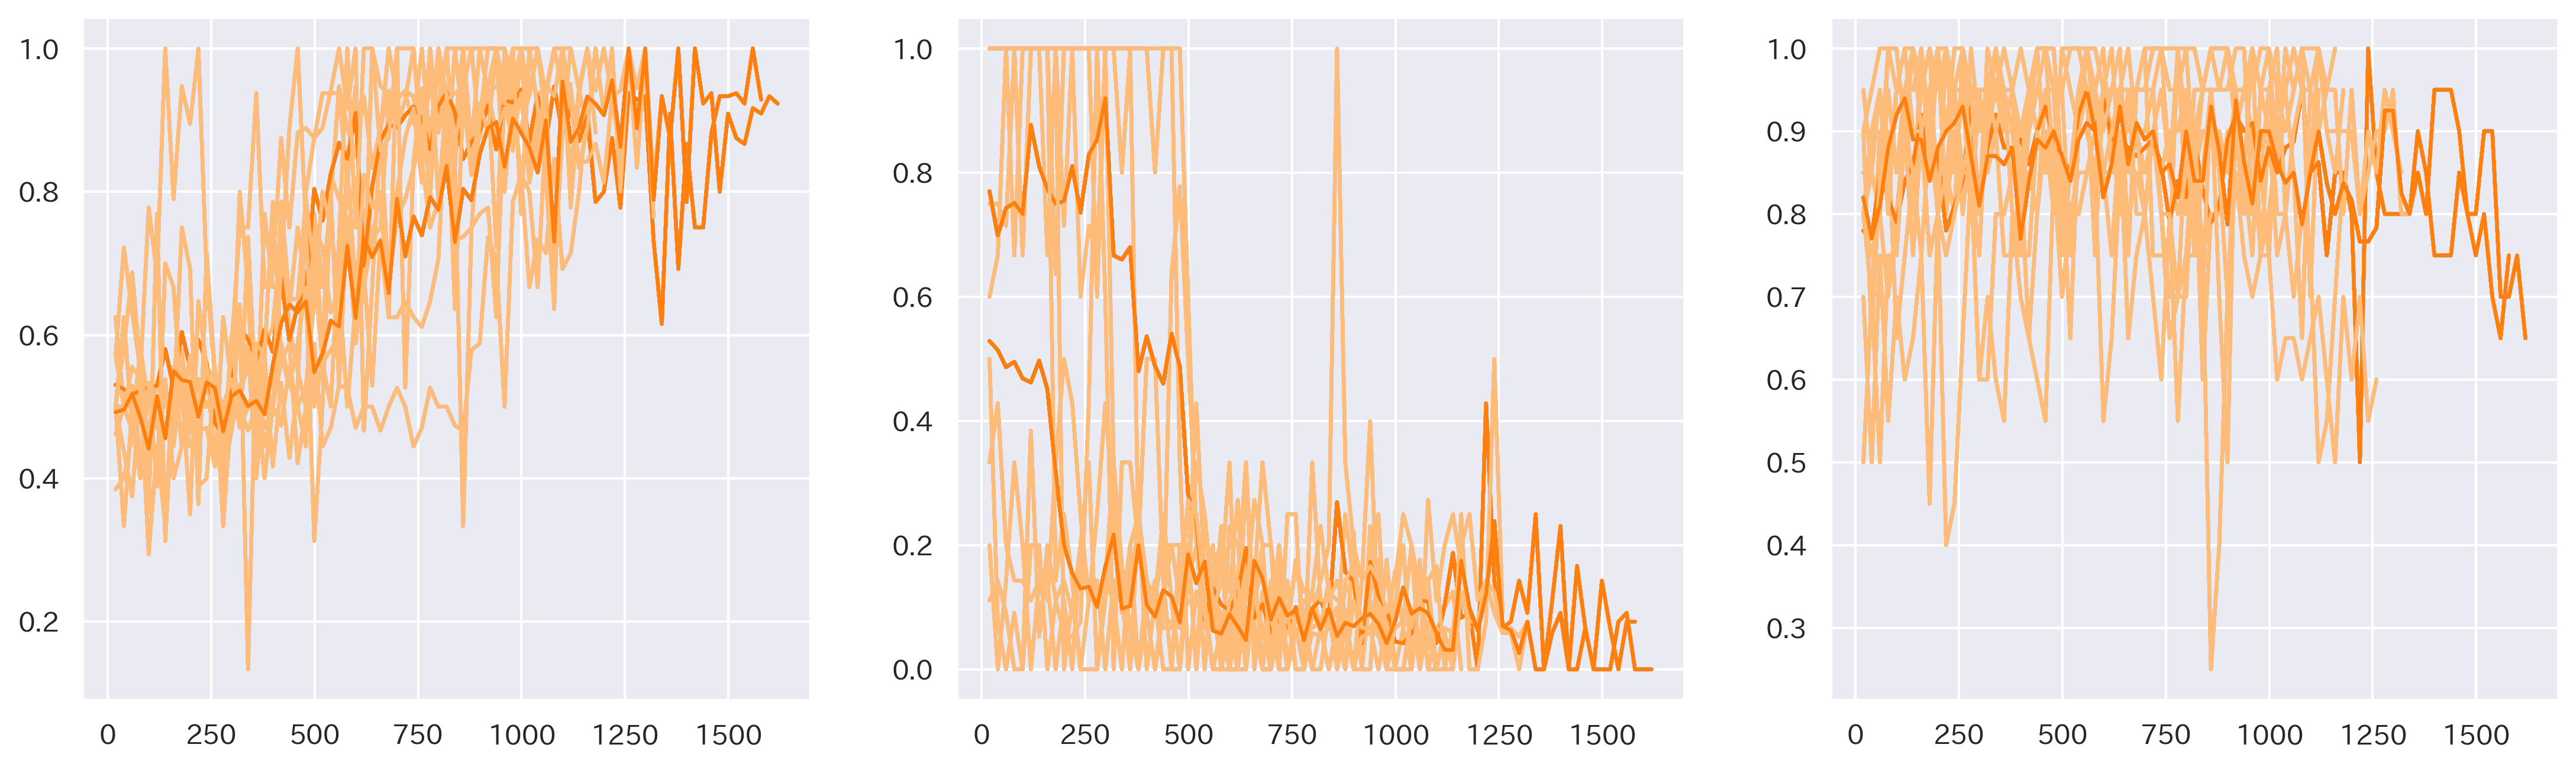

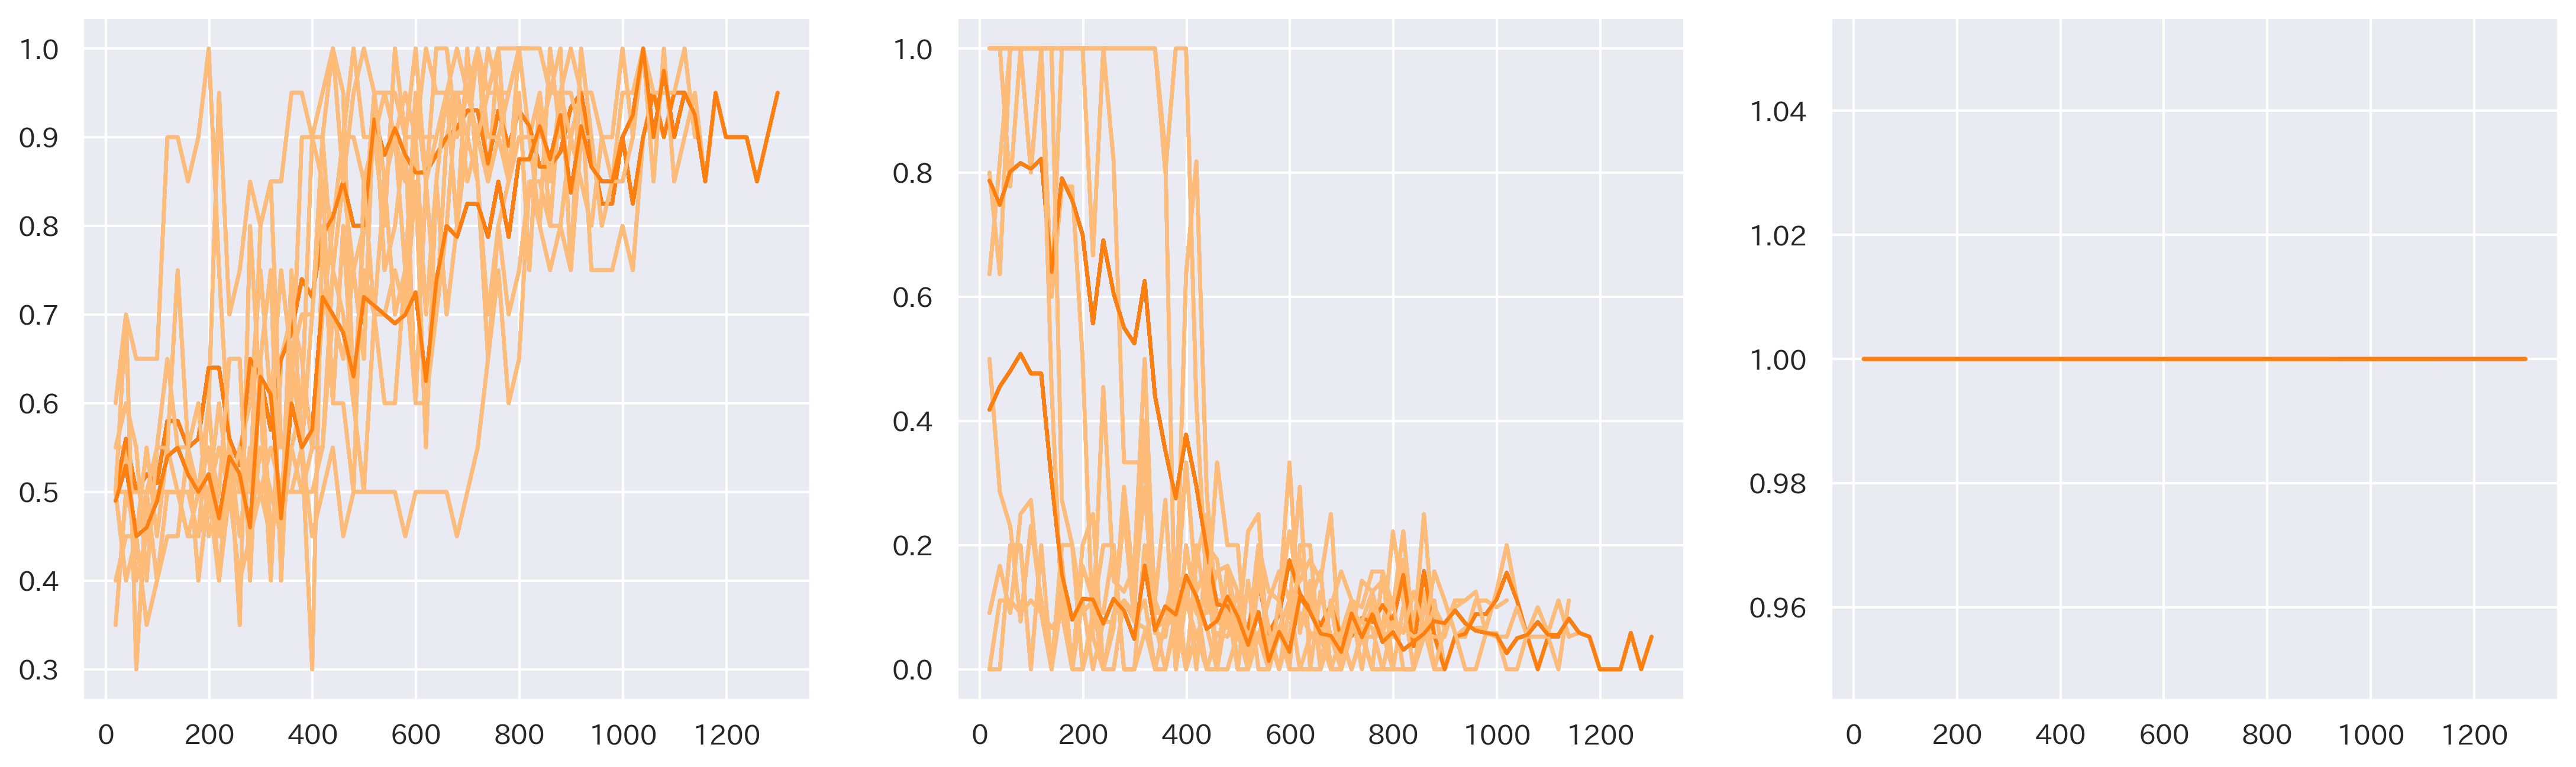

In [152]:
make_graph_from_xlsx(path_to_RawData_folder)